In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import splat

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
You are currently using version 2023.07.05

If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
df = pd.read_csv('train_variablenoise.csv') #previously: new_train3.csv
test = pd.read_csv('test.standardspt_removedoutliers85-245.csv')
#test = test.sample(frac = 1)

In [3]:
# Sample code to drop columns from 'test' DataFrame to match the columns in 'df' DataFrame
columns_to_keep = set(df.columns)
columns_to_drop = [col for col in test.columns if col not in columns_to_keep]

# Dropping the columns
test = test.drop(columns=columns_to_drop)

# Now test_dropped should have the same columns as df
test.shape, df.shape

((316, 123), (2400, 123))

In [4]:
def remove_dot_zero(s):
    return s[:-2] if s[-2:] == '.0' else s

In [5]:
df['spectral_type'] = [remove_dot_zero(s) for s in df['spectral_type']]
test['spectral_type'] = [remove_dot_zero(s) for s in test['spectral_type']]

In [6]:
#aganze = pd.read_hdf('single_spectra.h5')
#names = aganze[aganze['spectral_type'].str.len() <=4]['name'].tolist()

In [7]:
#aganze[aganze.duplicated(subset='name')]

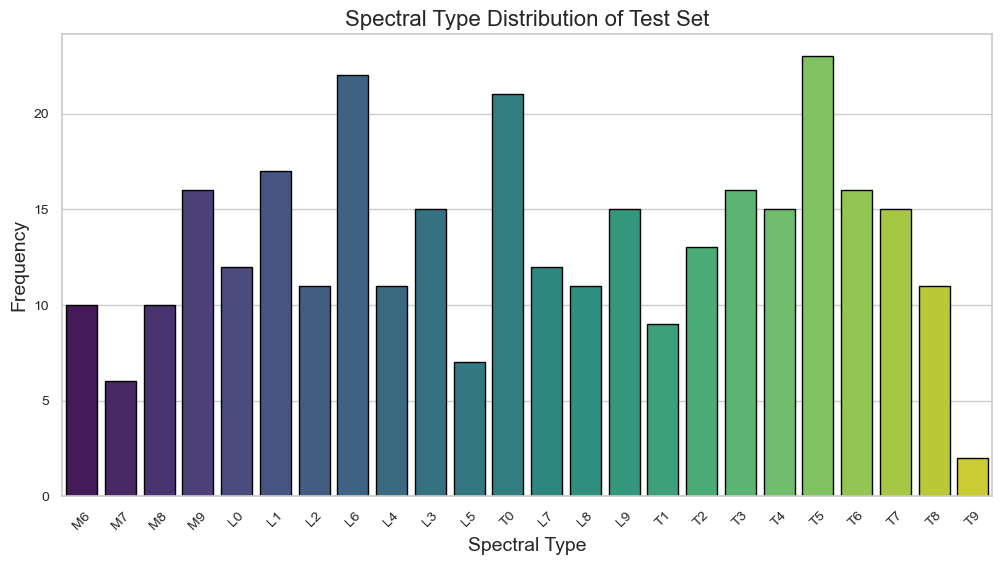

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set seaborn style
sns.set(style="whitegrid")

counted_spectral_types = Counter(test['spectral_type'])

plt.figure(figsize=(12, 6))

# Plot the histogram with custom colors and edge color
ax = sns.barplot(x=list(counted_spectral_types.keys()), y=list(counted_spectral_types.values()), palette="viridis", edgecolor="black")

# Customize the plot labels and title
plt.xlabel("Spectral Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Spectral Type Distribution of Test Set", fontsize=16)

# Customize the ticks
ax.tick_params(axis="x", labelsize=10, rotation=45)
ax.tick_params(axis="y", labelsize=10)

# Display the plot
plt.show()

In [9]:
y = df.spectral_type # we are predicting SpT

df_features = df.columns[1:]
X = df[df_features]

In [10]:
X

,"(0.85, 0.95)","(1.05, 1.15)","(1.15, 1.25)","(1.2, 1.35)","(1.25, 1.35)","(1.42, 1.52)","(1.52, 1.62)","(1.62, 1.72)","(1.72, 1.8)","(1.95, 2.05)",...,"(2.25, 2.27)","(2.27, 2.29)","(2.29, 2.31)","(2.31, 2.33)","(2.33, 2.35)","(2.35, 2.37)","(2.37, 2.39)","(2.39, 2.41)","(2.41, 2.43)","(2.43, 2.45)"
0,0.839596,1.039511,0.986131,0.927869,0.908157,0.640045,0.636191,0.614837,0.497690,0.321877,...,0.296428,0.289176,0.268650,0.256633,0.240280,0.238395,0.223937,0.214598,0.197320,0.187544
1,0.870871,1.072779,1.002958,0.955410,0.936268,0.657353,0.658666,0.631565,0.517687,0.328422,...,0.300034,0.300818,0.274603,0.264778,0.248951,0.245195,0.235343,0.219526,0.207759,0.186519
2,0.846174,1.053720,0.968340,0.922899,0.906101,0.635408,0.644217,0.620487,0.493838,0.320290,...,0.289965,0.294514,0.268585,0.254923,0.246533,0.234800,0.228059,0.215213,0.199157,0.182844
3,0.874589,1.079400,1.007554,0.955865,0.937071,0.662289,0.658743,0.646948,0.516931,0.333155,...,0.305936,0.301098,0.280278,0.266166,0.251379,0.241027,0.235356,0.219110,0.206035,0.192553
4,0.858247,1.071115,1.004528,0.949950,0.929986,0.649492,0.652908,0.632356,0.506088,0.326753,...,0.298842,0.299516,0.271231,0.265433,0.250941,0.240714,0.228736,0.216095,0.200122,0.192017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.048100,0.338061,0.265580,0.509366,0.527061,0.035635,0.350168,0.024608,0.024521,0.064428,...,0.006895,0.007909,0.001360,0.003796,-0.001642,0.002727,-0.005033,0.001328,0.007976,0.008583
2396,0.050148,0.355320,0.280421,0.528419,0.543376,0.039472,0.367513,0.027129,0.028145,0.069781,...,0.004218,0.005856,0.001095,0.000790,0.002210,0.000836,-0.001085,0.004405,0.006750,0.004122
2397,0.049069,0.329444,0.261504,0.498677,0.516882,0.038245,0.349818,0.025067,0.023085,0.066192,...,0.001969,0.005821,-0.002587,0.002510,0.002730,0.003941,-0.001727,0.001954,0.012586,0.006416
2398,0.055406,0.343458,0.275604,0.521815,0.537441,0.040007,0.363916,0.025804,0.027440,0.068797,...,0.001208,0.006532,-0.001313,-0.003160,0.007825,0.006547,-0.006652,0.005033,0.007301,-0.002997


In [11]:
#pd.set_option('display.max_columns', None)
test[test.isnull().any(axis=1)]
#0.85-0.87 is nan for index 271

,spectral_type,"(0.85, 0.95)","(1.05, 1.15)","(1.15, 1.25)","(1.2, 1.35)","(1.25, 1.35)","(1.42, 1.52)","(1.52, 1.62)","(1.62, 1.72)","(1.72, 1.8)",...,"(2.25, 2.27)","(2.27, 2.29)","(2.29, 2.31)","(2.31, 2.33)","(2.33, 2.35)","(2.35, 2.37)","(2.37, 2.39)","(2.39, 2.41)","(2.41, 2.43)","(2.43, 2.45)"
229,T4,0.169547,0.614676,0.708769,0.824603,0.792737,0.223115,0.571676,0.402681,0.207234,...,0.088695,0.061593,0.062833,0.049032,0.053255,0.052593,0.048438,0.055143,0.058265,0.063747


In [12]:
test.isnull().sum()
test.dropna(inplace=True)

In [13]:
test_X = test[df_features]
test_y = test['spectral_type']

In [14]:
train_X = X
train_y = y

In [15]:
for n_estimators in [50, 100, 200, 300,400, 500]: #finding the right number of decision-trees
    forest_model = RandomForestClassifier(n_estimators=n_estimators,random_state=42)
    forest_model.fit(X, train_y)
    y_preds = forest_model.predict(test_X)
    print("Model accuracy score with {0:0.0f} decision-trees : {1:0.6f}". format(n_estimators, accuracy_score(test_y , y_preds)))

Model accuracy score with 50 decision-trees : 0.780952
Model accuracy score with 100 decision-trees : 0.784127
Model accuracy score with 200 decision-trees : 0.800000
Model accuracy score with 300 decision-trees : 0.796825
Model accuracy score with 400 decision-trees : 0.806349
Model accuracy score with 500 decision-trees : 0.803175


In [16]:
forest_model = RandomForestClassifier(n_estimators=400,random_state=42)
forest_model.fit(X, train_y)
y_preds = forest_model.predict(test_X)
print("Model accuracy score with {0:0.0f} decision-trees : {1:0.6f}". format(n_estimators, accuracy_score(test_y , y_preds)))

Model accuracy score with 500 decision-trees : 0.806349


In [17]:
feature_scores = pd.Series(forest_model.feature_importances_, index=df_features).sort_values(ascending=False)

feature_scores #REMOVE DUPLICATES!

(0.8, 0.85)     0.024026
(1.0, 1.05)     0.022580
(1.42, 1.44)    0.019607
(0.99, 1.01)    0.019479
(0.85, 1.05)    0.018067
                  ...   
(1.25, 1.35)    0.001378
(1.54, 1.56)    0.001192
(1.27, 1.29)    0.000351
(1.25, 1.3)     0.000204
(1.25, 1.27)    0.000171
Length: 122, dtype: float64

In [18]:
def spectral_type_accuracy(y_true, y_pred):
    """
    Calculates the accuracy of a spectral type classification model with plus minus 1 spectral type uncertainty.

    Args:
    y_true (array-like): True spectral types of the data in string format (e.g. 'M0', 'L1', etc.).
    y_pred (array-like): Predicted spectral types of the data in string format.

    Returns:
    accuracy (float): Accuracy of the model with plus minus 1 spectral type uncertainty.
    """
    # Define a dictionary that maps each spectral type string to an integer value
    type_to_int = {'M0': 0, 'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5,
               'M6': 6, 'M7': 7, 'M8': 8, 'M9': 9, 'L0': 10, 'L1': 11,
               'L2': 12, 'L3': 13, 'L4': 14, 'L5': 15, 'L6': 16, 'L7': 17,
               'L8':18, 'L9':19, 'T0':20, 'T1':21, 'T2':22, 'T3':23,
               'T4':24, 'T5':25, 'T6':26, 'T7':27, 'T8':28, 'T9':29}
    # Initialize the count of correct predictions to 0
    correct_predictions = 0

    # Iterate over the true and predicted spectral types
    for true_type, pred_type in zip(y_true, y_pred):
        
        # Convert the spectral type strings to integers using the type_to_int dictionary
        true_type_int = type_to_int[true_type]
        pred_type_int = type_to_int[pred_type]
        
        # Check if the predicted spectral type is within plus minus 1 spectral type of the true spectral type
        if (pred_type_int >= true_type_int - 1) and (pred_type_int <= true_type_int + 1):
            
            # Increment the count of correct predictions
            correct_predictions += 1
    
    # Calculate the accuracy as the ratio of correct predictions to the total number of predictions
    accuracy = correct_predictions / len(y_true)

    return accuracy

In [19]:
spectral_type_accuracy(test_y,y_preds)

0.9492063492063492

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# LogisticRegression

In [21]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)
Y_pred = logreg.predict(test_X)
train_accuracy_logreg = round(logreg.score(train_X, train_y) * 100, 2)
test_accuracy_logreg = round(logreg.score(test_X, test_y) * 100, 2)
train_accuracy_logreg ,test_accuracy_logreg

(100.0, 71.11)

In [22]:
spectral_type_accuracy(test_y,Y_pred)

0.9301587301587302

# Support Vector Machines

In [23]:
svc = SVC()
svc.fit(train_X, train_y)
Y_pred = svc.predict(test_X)
train_accuracy_svc = round(svc.score(train_X, train_y) * 100, 2)
test_accuracy_svc = round(svc.score(test_X, test_y) * 100, 2)
train_accuracy_svc,test_accuracy_svc


(97.75, 80.63)

In [24]:
spectral_type_accuracy(test_y,Y_pred)

0.9746031746031746

# k-Nearest Neighbors

In [25]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train_X, train_y)
Y_pred = knn.predict(test_X)
train_accuracy_knn = round(knn.score(train_X, train_y) * 100, 2)
test_accuracy_knn = round(knn.score(test_X, test_y) * 100, 2)
train_accuracy_knn ,test_accuracy_knn 

(99.88, 84.44)

In [26]:
spectral_type_accuracy(test_y,Y_pred)

0.9841269841269841

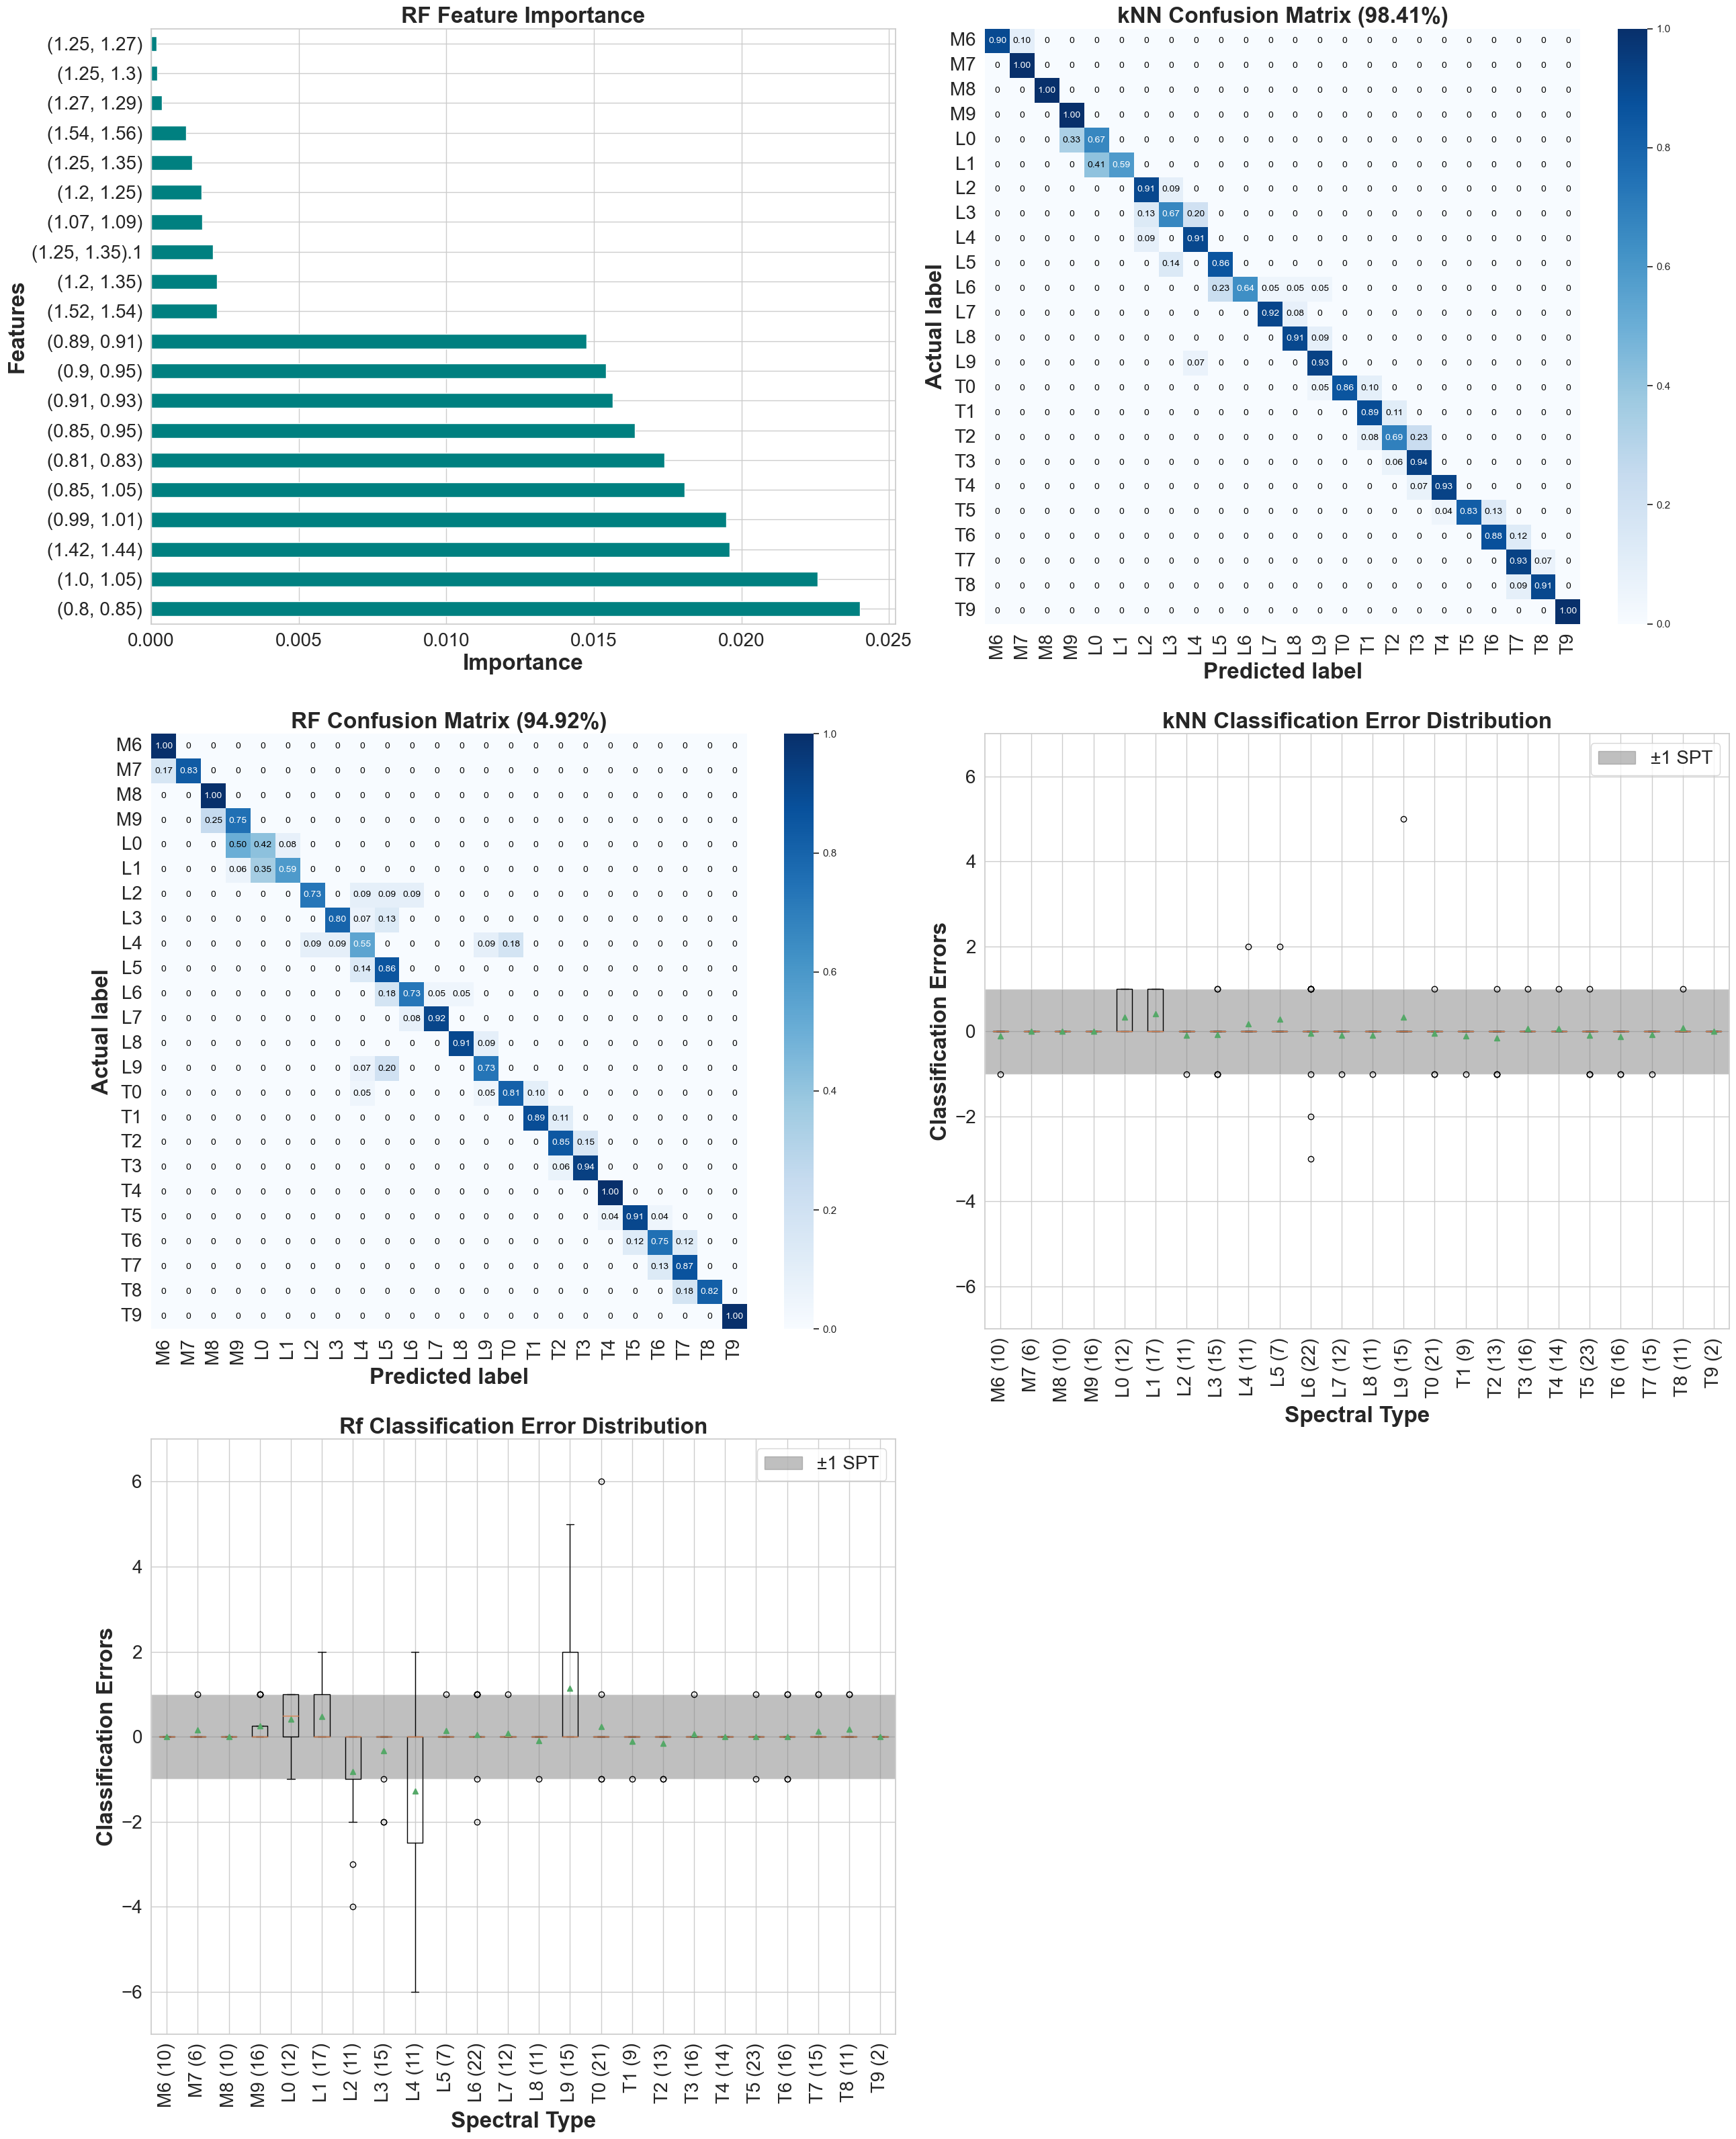

In [27]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

type_to_int = {'M0': 0, 'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5,
               'M6': 6, 'M7': 7, 'M8': 8, 'M9': 9, 'L0': 10, 'L1': 11,
               'L2': 12, 'L3': 13, 'L4': 14, 'L5': 15, 'L6': 16, 'L7': 17,
               'L8':18, 'L9':19, 'T0':20, 'T1':21, 'T2':22, 'T3':23,
               'T4':24, 'T5':25, 'T6':26, 'T7':27, 'T8':28, 'T9':29}

spectral_types = [
               'M6', 'M7', 'M8', 'M9', 'L0', 'L1',
               'L2', 'L3', 'L4', 'L5', 'L6', 'L7',
               'L8', 'L9', 'T0', 'T1', 'T2', 'T3',
               'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

test_labels = np.unique(test_y)

# Remove labels not in the test set from spectral_types
spectral_types = [label for label in spectral_types if label in test_labels]

# Convert the actual and predicted spectra to integers
test_y_int = np.array([type_to_int[s] for s in test_y])
y_pred_int_knn = np.array([type_to_int[s] for s in Y_pred])
y_pred_int_rf = np.array([type_to_int[s] for s in y_preds])

# Collect the errors for each subtype and count the number of objects in each subtype
errors_list_knn = []
errors_list_rf = []
subtype_counts = []
for i, s in enumerate(spectral_types):
    indices = np.where(test_y_int == type_to_int[s])[0]
    if len(indices) > 0:
        errors_knn = test_y_int[indices] - y_pred_int_knn[indices]
        errors_rf = test_y_int[indices] - y_pred_int_rf[indices]
        errors_list_knn.append(errors_knn)
        errors_list_rf.append(errors_rf)
        subtype_counts.append(len(indices))
    else:
        errors_list_knn.append(np.array([]))
        errors_list_rf.append(np.array([]))
        subtype_counts.append(0)
legend_patch = Patch(color='grey', alpha=0.5, label='±1 SPT')
# Update the labels with the number of objects in each subtype
updated_labels = [f"{s} ({count})" for s, count in zip(spectral_types, subtype_counts)]

fig, axs = plt.subplots(3, 2, figsize=(26,32))  # 3 rows, 2 columns

feature_scores = pd.Series(forest_model.feature_importances_, index=df_features).sort_values(ascending=False)
selected_features_spectral = pd.concat([feature_scores.head(10), feature_scores.tail(10)])

# Random Forest Feature Importance (First subplot in the first column)
selected_features_spectral.plot(kind='barh', color='teal', ax=axs[0, 0])
axs[0, 0].set_title('RF Feature Importance', fontsize=24, fontweight='bold')
axs[0, 0].tick_params(axis='both', which='major', labelsize=20)
axs[0, 0].set_ylabel('Features', fontsize=24, fontweight='bold')  
axs[0, 0].set_xlabel('Importance', fontsize=24, fontweight='bold') 

# Function to format the annotations
def format_ratio(val):
    if val == 0:
        return '0'
    else:
        return f"{val:.2f}"
    
def plot_confusion_matrix(ax, cm, labels):
    sns.heatmap(cm, annot=False, cmap='Blues', ax=ax, cbar=True)
    ax.set_xticks(np.arange(len(labels)) + 0.5)
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticklabels(labels, rotation=360)

 # Manually set the annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ratio = cm[i, j] / cm[i, :].sum()
            text = format_ratio(ratio)
            color = 'white' if ratio > 0.5 else 'black'  # Adjust the threshold as needed
            ax.text(j + 0.5, i + 0.5, text, fontsize=10, ha='center', va='center', color=color)

# Calculate the ratio for Random Forest Confusion Matrix
cm_rf = confusion_matrix(test_y, y_preds, labels=spectral_types)
cm_rf_ratio = (cm_rf / cm_rf.sum(axis=1)[:, np.newaxis])
plot_confusion_matrix(axs[1, 0], cm_rf_ratio, spectral_types)
axs[1, 0].set_title('RF Confusion Matrix (94.92%)', fontsize=24, fontweight='bold')
axs[1, 0].set_ylabel('Actual label', fontsize=24, fontweight='bold')
axs[1, 0].set_xlabel('Predicted label', fontsize=24, fontweight='bold')
axs[1, 0].tick_params(axis='both', which='major', labelsize=20)
#axs[1, 0].set_yticklabels(labels=spectral_types, rotation=90) 

# Random Forest Box Plot (Third subplot in the first column)
axs[2, 0].boxplot(errors_list_rf, showmeans=True)
axs[2, 0].set_ylim(-7, 7)
axs[2, 0].set_xticklabels(updated_labels, rotation=90, fontsize=12)  
axs[2, 0].set_xlabel('Spectral Type', fontsize=24, fontweight='bold')  
axs[2, 0].set_ylabel('Classification Errors', fontsize=24, fontweight='bold') 
axs[2, 0].set_title('Rf Classification Error Distribution', fontsize=24, fontweight='bold')
axs[2, 0].axhspan(-1, 1, facecolor='grey', alpha=0.5)
axs[2, 0].legend(handles=[legend_patch], fontsize=20)
axs[2, 0].tick_params(axis='both', which='major', labelsize=20)

# Calculate the ratio for kNN Confusion Matrix
cm_knn_subplot = confusion_matrix(test_y, Y_pred, labels=spectral_types)
cm_knn_ratio = (cm_knn_subplot / cm_knn_subplot.sum(axis=1)[:, np.newaxis])
plot_confusion_matrix(axs[0, 1], cm_knn_ratio, spectral_types)
axs[0, 1].set_title('kNN Confusion Matrix (98.41%)', fontsize=24, fontweight='bold')
axs[0, 1].set_ylabel('Actual label', fontsize=24, fontweight='bold')
axs[0, 1].set_xlabel('Predicted label', fontsize=24, fontweight='bold')
axs[0, 1].tick_params(axis='both', which='major', labelsize=20)
#axs[0, 1].set_yticklabels(labels=spectral_types, rotation=90)

axs[1, 1].boxplot(errors_list_knn, showmeans=True)
axs[1, 1].set_ylim(-7, 7) 
axs[1, 1].set_xticklabels(updated_labels, rotation=90, fontsize=12)  
axs[1, 1].set_xlabel('Spectral Type', fontsize=24, fontweight='bold')  
axs[1, 1].set_ylabel('Classification Errors', fontsize=24, fontweight='bold') 
axs[1, 1].set_title('kNN Classification Error Distribution', fontsize=24, fontweight='bold')
axs[1, 1].axhspan(-1, 1, facecolor='grey', alpha=0.5)
axs[1, 1].legend(handles=[legend_patch], fontsize=20)
axs[1, 1].tick_params(axis='both', which='major', labelsize=20)
axs[2, 1].axis('off')
# Adjust layout and save
plt.tight_layout()
plt.savefig('combined_plot.pdf')
plt.show()

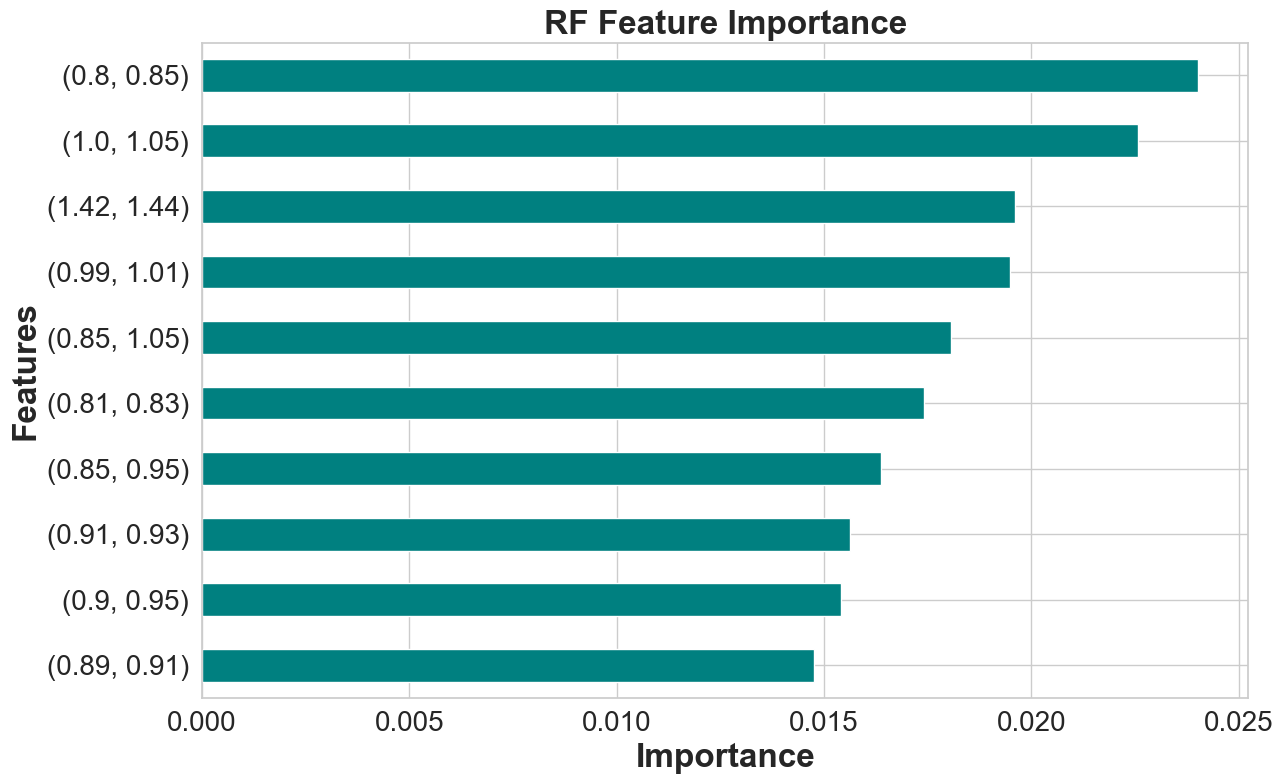

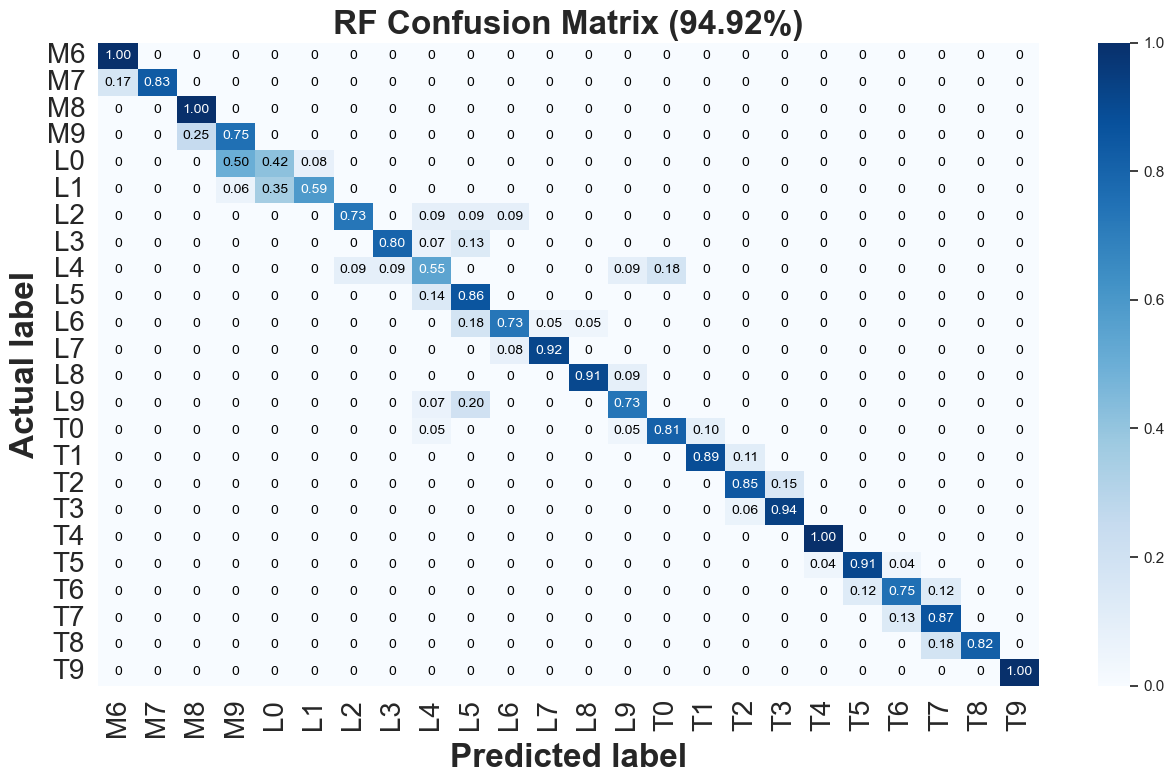

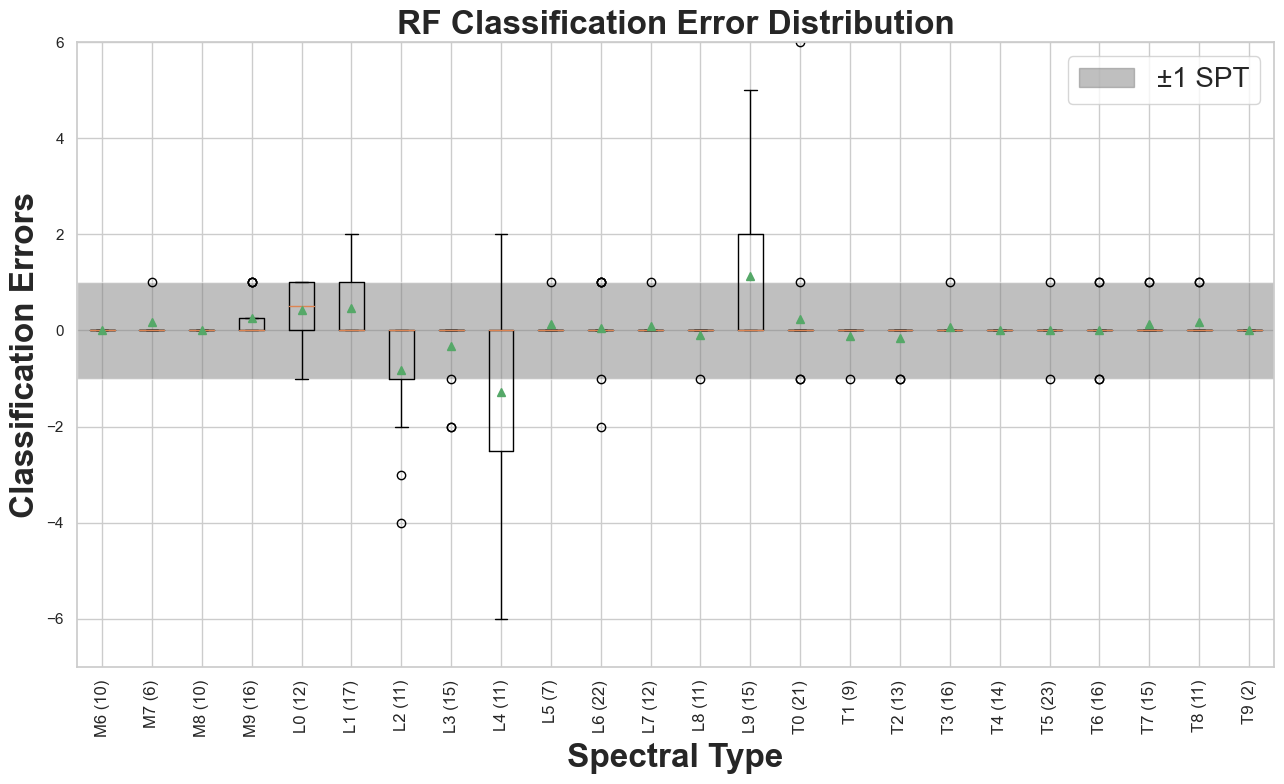

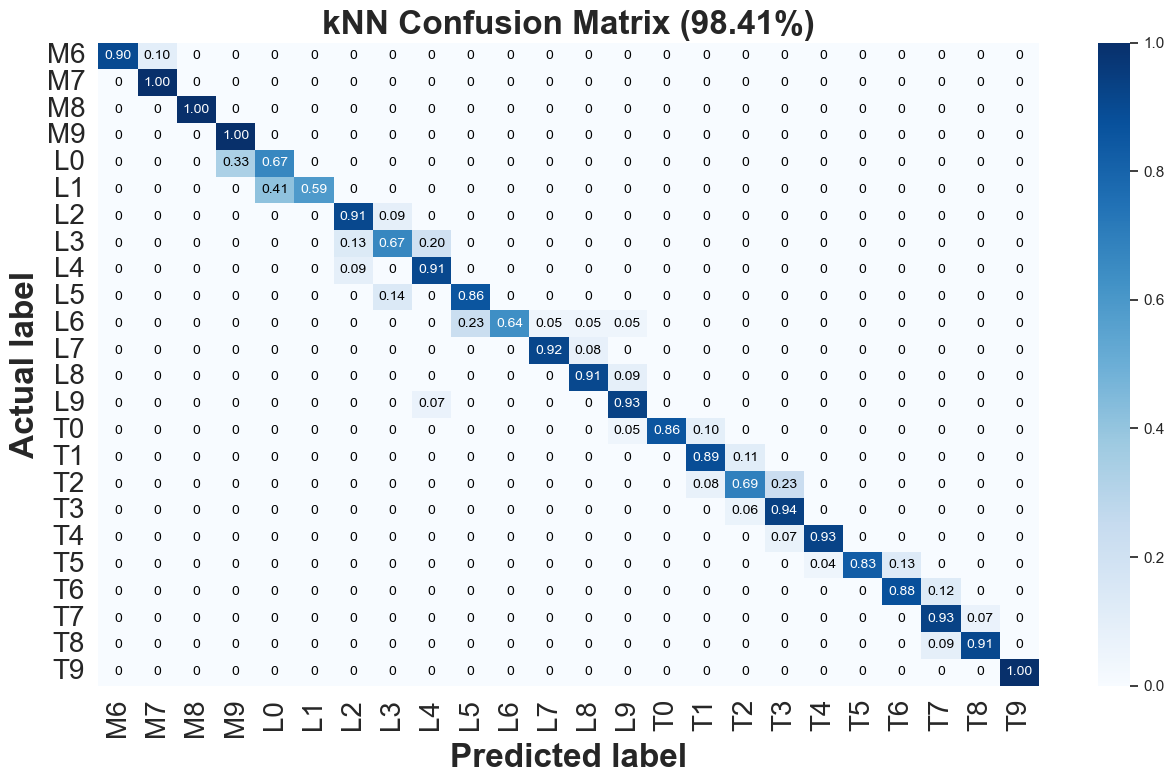

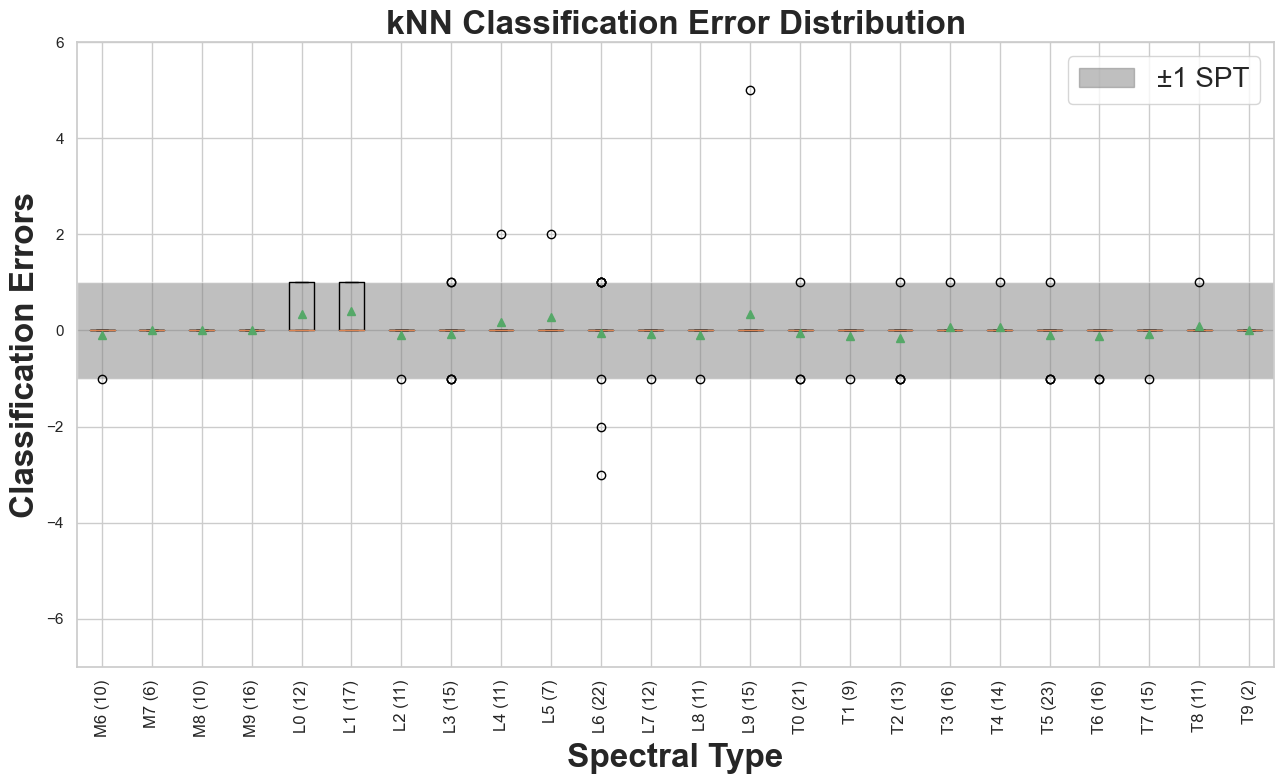

In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

type_to_int = {'M0': 0, 'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5,
               'M6': 6, 'M7': 7, 'M8': 8, 'M9': 9, 'L0': 10, 'L1': 11,
               'L2': 12, 'L3': 13, 'L4': 14, 'L5': 15, 'L6': 16, 'L7': 17,
               'L8':18, 'L9':19, 'T0':20, 'T1':21, 'T2':22, 'T3':23,
               'T4':24, 'T5':25, 'T6':26, 'T7':27, 'T8':28, 'T9':29}

spectral_types = [
               'M6', 'M7', 'M8', 'M9', 'L0', 'L1',
               'L2', 'L3', 'L4', 'L5', 'L6', 'L7',
               'L8', 'L9', 'T0', 'T1', 'T2', 'T3',
               'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

test_labels = np.unique(test_y)
legend_patch = Patch(color='grey', alpha=0.5, label='±1 SPT')
# Remove labels not in the test set from spectral_types
spectral_types = [label for label in spectral_types if label in test_labels]

# Convert the actual and predicted spectra to integers
test_y_int = np.array([type_to_int[s] for s in test_y])
y_pred_int_knn = np.array([type_to_int[s] for s in Y_pred])
y_pred_int_rf = np.array([type_to_int[s] for s in y_preds])

# Collect the errors for each subtype and count the number of objects in each subtype
errors_list_knn = []
errors_list_rf = []
subtype_counts = []
for i, s in enumerate(spectral_types):
    indices = np.where(test_y_int == type_to_int[s])[0]
    if len(indices) > 0:
        errors_knn = test_y_int[indices] - y_pred_int_knn[indices]
        errors_rf = test_y_int[indices] - y_pred_int_rf[indices]
        errors_list_knn.append(errors_knn)
        errors_list_rf.append(errors_rf)
        subtype_counts.append(len(indices))
    else:
        errors_list_knn.append(np.array([]))
        errors_list_rf.append(np.array([]))
        subtype_counts.append(0)

# Update the labels with the number of objects in each subtype
updated_labels = [f"{s} ({count})" for s, count in zip(spectral_types, subtype_counts)]

feature_scores = pd.Series(forest_model.feature_importances_, index=df_features).sort_values(ascending=False)
selected_features_spectral = feature_scores.head(10).iloc[::-1]

# Function to format the annotations
def format_ratio(val):
    if val == 0:
        return '0'
    else:
        return f"{val:.2f}"
    
def plot_confusion_matrix(ax, cm, labels):
    sns.heatmap(cm, annot=False, cmap='Blues', ax=ax, cbar=True)
    ax.set_xticks(np.arange(len(labels)) + 0.5)
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticklabels(labels, rotation=360)

 # Manually set the annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ratio = cm[i, j] / cm[i, :].sum()
            text = format_ratio(ratio)
            color = 'white' if ratio > 0.5 else 'black'  # Adjust the threshold as needed
            ax.text(j + 0.5, i + 0.5, text, fontsize=10, ha='center', va='center', color=color)

# Function to save and show individual plots
def save_and_show_plot(filename):
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    
cm_rf = confusion_matrix(test_y, y_preds, labels=spectral_types)
cm_rf_ratio = (cm_rf / cm_rf.sum(axis=1)[:, np.newaxis])

# 1. RF Feature Importance
plt.figure(figsize=(13, 8))
selected_features_spectral.plot(kind='barh', color='teal')
plt.title('RF Feature Importance', fontsize=24, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Features', fontsize=24, fontweight='bold')
plt.xlabel('Importance', fontsize=24, fontweight='bold')
save_and_show_plot('Top 10 rf_feature_importance.pdf')

# 2. RF Confusion Matrix
plt.figure(figsize=(13, 8))
plot_confusion_matrix(plt.gca(), cm_rf_ratio, spectral_types)
plt.title('RF Confusion Matrix (94.92%)', fontsize=24, fontweight='bold')
plt.ylabel('Actual label', fontsize=24, fontweight='bold')
plt.xlabel('Predicted label', fontsize=24, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
save_and_show_plot('rf_confusion_matrix.pdf')

# 3. RF Classification Error Distribution
plt.figure(figsize=(13, 8))
plt.boxplot(errors_list_rf, showmeans=True)
plt.xticks(ticks=np.arange(1, len(updated_labels) + 1), labels=updated_labels, rotation=90, fontsize=12)
plt.ylim(-7,6)
plt.xlabel('Spectral Type', fontsize=24, fontweight='bold')
plt.ylabel('Classification Errors', fontsize=24, fontweight='bold')
plt.title('RF Classification Error Distribution', fontsize=24, fontweight='bold')
plt.axhspan(-1, 1, facecolor='grey', alpha=0.5)
plt.legend(handles=[legend_patch], fontsize=20)
save_and_show_plot('rf_classification_error_distribution.pdf')

# 4. kNN Confusion Matrix
cm_knn_subplot = confusion_matrix(test_y, Y_pred, labels=spectral_types)
cm_knn_ratio = (cm_knn_subplot / cm_knn_subplot.sum(axis=1)[:, np.newaxis])
plt.figure(figsize=(13, 8))
plot_confusion_matrix(plt.gca(), cm_knn_ratio, spectral_types)
plt.title('kNN Confusion Matrix (98.41%)', fontsize=24, fontweight='bold')
plt.ylabel('Actual label', fontsize=24, fontweight='bold')
plt.xlabel('Predicted label', fontsize=24, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
save_and_show_plot('knn_confusion_matrix.pdf')

# 5. kNN Classification Error Distribution
plt.figure(figsize=(13, 8))
plt.boxplot(errors_list_knn, showmeans=True)
plt.ylim(-7,6)
plt.xticks(ticks=np.arange(1, len(updated_labels) + 1), labels=updated_labels, rotation=90, fontsize=12)
plt.xlabel('Spectral Type', fontsize=24, fontweight='bold')
plt.ylabel('Classification Errors', fontsize=24, fontweight='bold')
plt.title('kNN Classification Error Distribution', fontsize=24, fontweight='bold')
plt.axhspan(-1, 1, facecolor='grey', alpha=0.5)
plt.legend(handles=[legend_patch], fontsize=20)
save_and_show_plot('knn_classification_error_distribution.pdf')